In [1]:
from signal_utils import *

# Real Signal

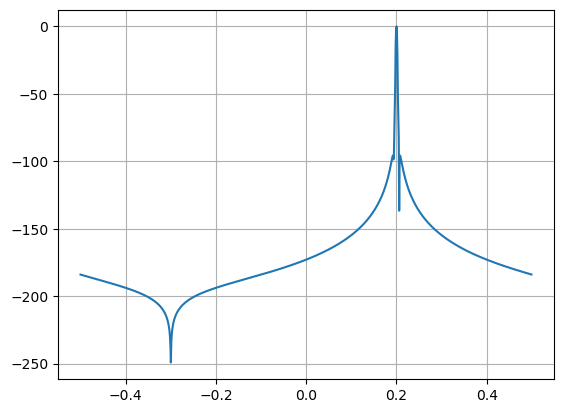

In [54]:
N = 2**10
n = np.arange(N)

perc = 0.15
Fmax = 0.5 * (1 - perc)

F = 0.2

xi_test = 1.0 * np.cos(2*np.pi*F*n)
xq_test = 1.0 * np.sin(2*np.pi*F*n)

np.savetxt("../../../../VHDL/data/delay_test/xin_i_test.txt", xi_test, fmt="%.12f")
np.savetxt("../../../../VHDL/data/delay_test/xin_q_test.txt", xq_test, fmt="%.12f")

xiq_test = xi_test + 1j*xq_test
freqs_test, xfftdB_test, an_ = fftdB(xiq_test, True)
plt.figure()
plt.plot(freqs_test, xfftdB_test)
plt.grid()
plt.show()

In [45]:
k3 = np.array([0.5, 0.0, -0.5])
k5 = np.array([-1, 8, 0, -8, +1]) / 12.0
k7 = np.array([1, -9, +45, 0, -45, +9, -1]) / 60.0
k9 = np.array([-1, 12, -39, +56, 0, -56, +39, -12, +1]) / 280.0

np.savetxt("../../../../VHDL/data/delay_test/k3.txt", k3, fmt="%.12f")
np.savetxt("../../../../VHDL/data/delay_test/k5.txt", k5, fmt="%.12f")
np.savetxt("../../../../VHDL/data/delay_test/k7.txt", k7, fmt="%.12f")

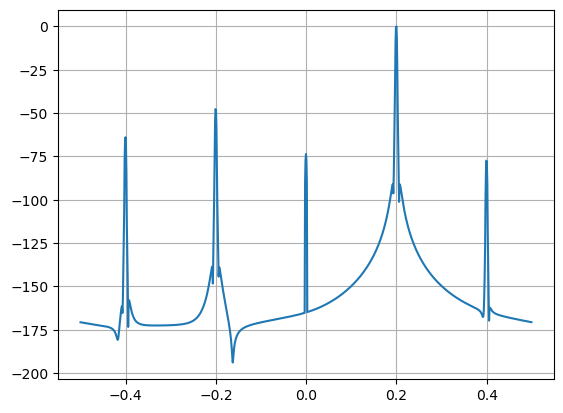

In [55]:
xout_i_test = np.loadtxt("../../../../VHDL/data/delay_test/xout_i_test.txt", dtype=np.int32)
xout_q_test = np.loadtxt("../../../../VHDL/data/delay_test/xout_q_test.txt", dtype=np.int32)
xout_iq_test = xout_i_test + 1j*xout_q_test

freq_test, xfftdB_test, an = fftdB(xout_iq_test, True)
plt.figure()
plt.plot(freq_test, xfftdB_test)
# plt.ylim([-95, 5])
plt.grid()

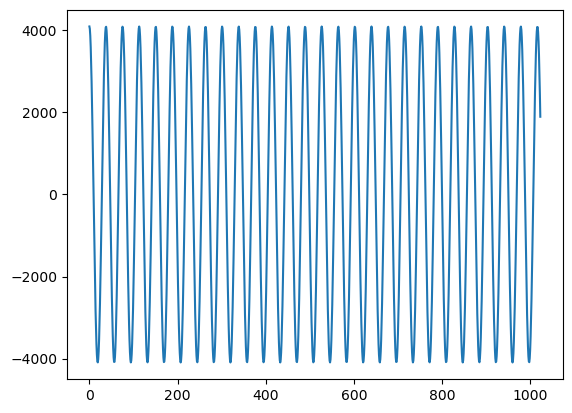

In [48]:
plt.figure()
plt.plot(xi_test*2**12)
# plt.plot(xout_test)

In [77]:
xi_osr8 = np.loadtxt("../../../../VHDL/data/stage1_test/xout_i_osr8.txt", dtype=np.int32)*2**-15
xq_osr8 = np.loadtxt("../../../../VHDL/data/stage1_test/xout_q_osr8.txt", dtype=np.int32)*2**-15

delta = 1/8/32
i_delta = -delta
q_delta = delta
k7 = np.array([1, -9, +45, 0, -45, +9, -1]) / 60.0

xi_delay = frac_delay_1st(xi_osr8*1/(1+delta), i_delta, k7)
xq_delay = frac_delay_1st(xq_osr8*1/(1+delta), q_delta, k7)

np.savetxt("../../../../VHDL/data/delay_test/xin_i_delay.txt", xi_delay, fmt="%.12f")
np.savetxt("../../../../VHDL/data/delay_test/xin_q_delay.txt", xq_delay, fmt="%.12f")

0.999969482421875 -1.0
0.99951171875 -1.0
0.9961188171624209 -0.9961255104470655
0.9956225680933852 -0.9961201253413535


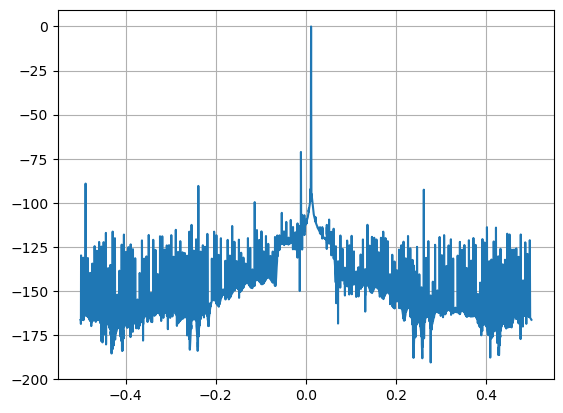

In [78]:
print(np.max(xi_osr8), np.min(xi_osr8))
print(np.max(xq_osr8), np.min(xq_osr8))

print(np.max(xi_delay), np.min(xi_delay))
print(np.max(xq_delay), np.min(xq_delay))

xout_iq_delay = xi_delay + 1j*xq_delay

freq_out_delay, xfftdB_out_delay, an = fftdB(xout_iq_delay, True)
plt.figure()
plt.plot(freq_out_delay, xfftdB_out_delay)
plt.grid()

1024


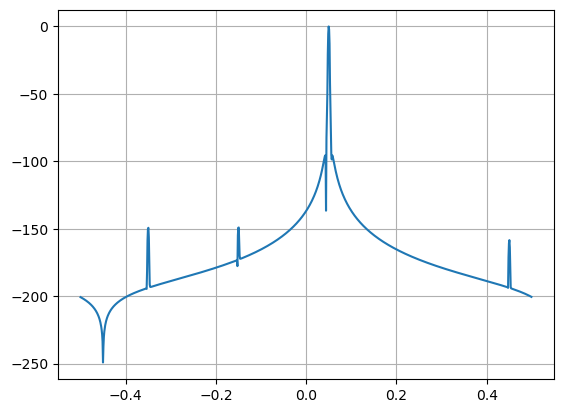

In [76]:
xout_i_dsin = np.loadtxt("../../../../VHDL/data/delay_test/xout_i_dsin.txt", dtype=np.int32)
xout_q_dsin = np.loadtxt("../../../../VHDL/data/delay_test/xout_q_dsin.txt", dtype=np.int32)
xout_iq_dsin = xout_i_dsin + 1j*xout_q_dsin

print(len(xout_i_dsin))

freq_out_dsin, xfftdB_out_dsin, an = fftdB(xout_iq_dsin, True)
plt.figure()
plt.plot(freq_out_dsin, xfftdB_out_dsin)
plt.grid()

1024


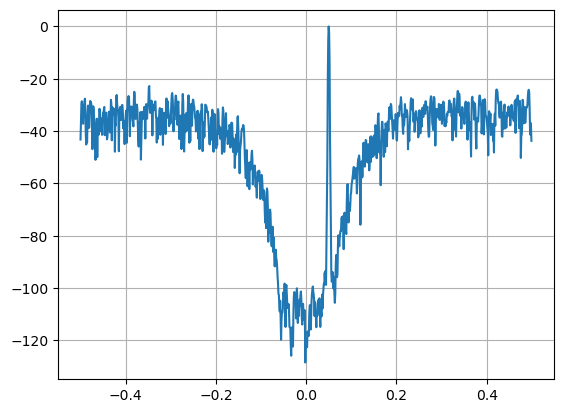

In [71]:
xout_i_ds = np.loadtxt("../../../../VHDL/data/delay_test/xout_i_ds.txt", dtype=np.int32)
xout_q_ds = np.loadtxt("../../../../VHDL/data/delay_test/xout_q_ds.txt", dtype=np.int32)
xout_iq_ds = xout_i_ds + 1j*xout_q_ds

print(len(xout_i_ds))

freq_out_ds, xfftdB_out_ds, an = fftdB(xout_iq_ds, True)
plt.figure()
plt.plot(freq_out_ds, xfftdB_out_ds)
plt.grid()

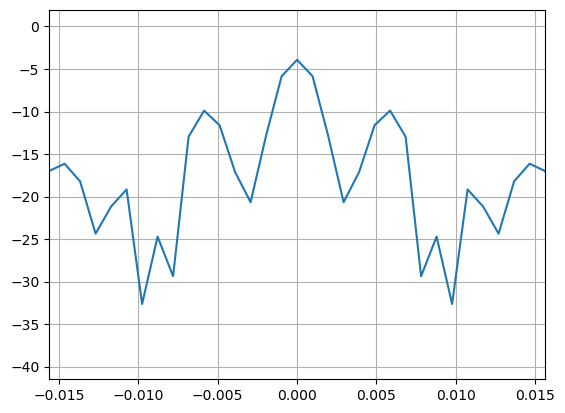

In [70]:
xout_i_stage2 = np.loadtxt("../../../../VHDL/data/delay_test/xout_i_stage2.txt", dtype=np.int32)
xout_q_stage2 = np.loadtxt("../../../../VHDL/data/delay_test/xout_q_stage2.txt", dtype=np.int32)
xout_i_stage2 = np.where(xout_i_stage2 == 0, -1, 1)
xout_q_stage2 = np.where(xout_q_stage2 == 0, -1, 1)
xout_iq_stage2 = xout_i_stage2 + 1j*xout_q_stage2

freq_out_stage2, xfftdB_out_stage2, an = fftdB(xout_iq_stage2, True)
plt.figure()
plt.plot(freq_out_stage2, xfftdB_out_stage2)
plt.xlim([-0.5/32, 0.5/32])
plt.grid()